In [126]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [127]:
prices = pd.read_csv('round-1-island-data-bottle/prices_round_1_day_0.csv', sep=';')
trades = pd.read_csv('round-1-island-data-bottle/trades_round_1_day_0.csv', sep=';')

In [128]:
ink = prices[prices["product"] == "SQUID_INK"]

In [129]:
ink['timestamp'].value_counts().value_counts()

count
1    10000
Name: count, dtype: int64

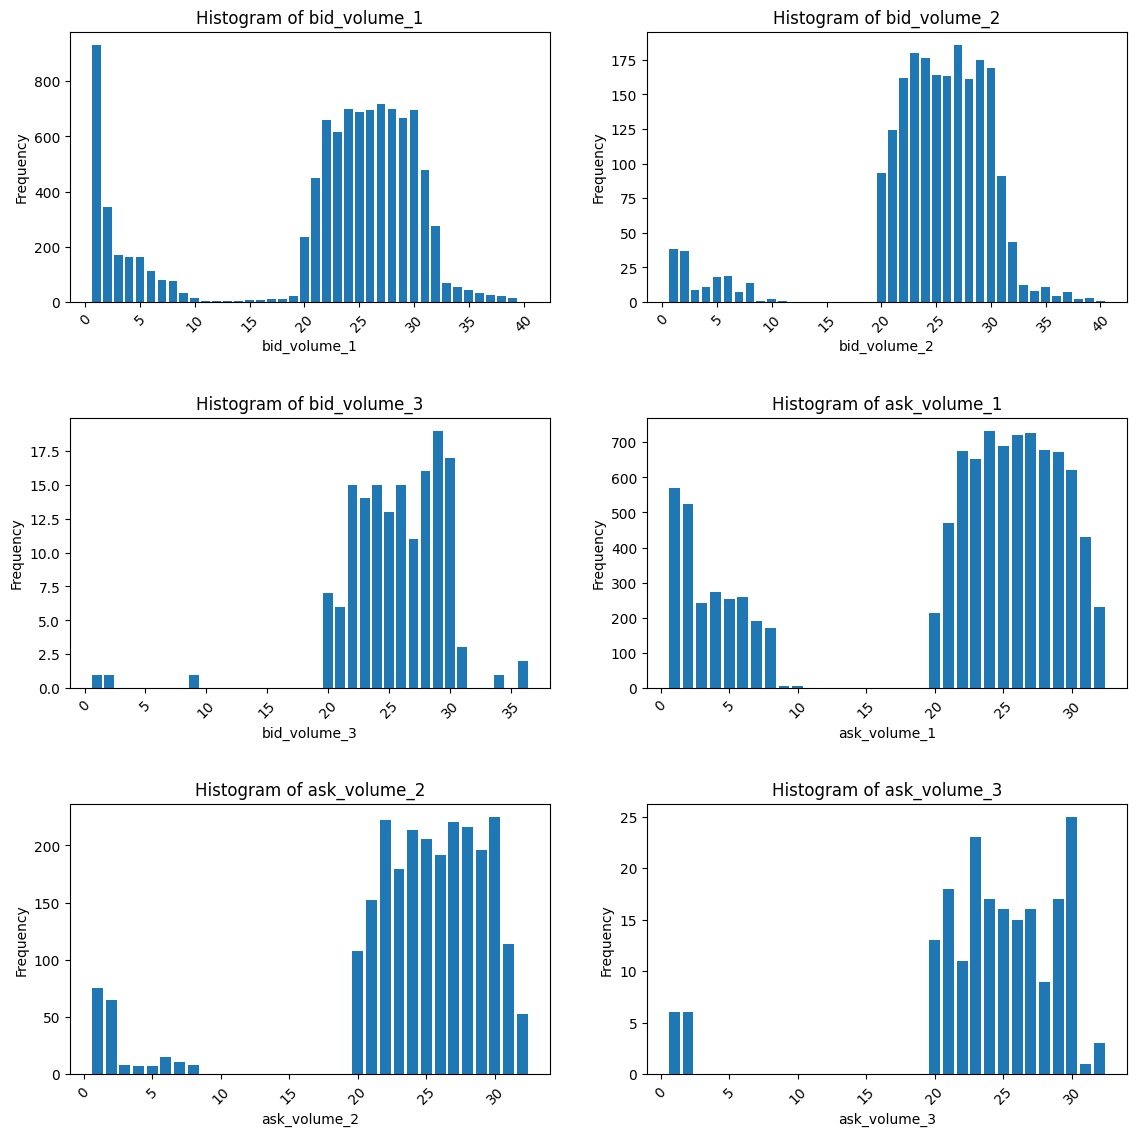

In [130]:
cols_to_plot = ['bid_volume_1', 'bid_volume_2', 'bid_volume_3',
                   'ask_volume_1', 'ask_volume_2', 'ask_volume_3']

num_plots = len(cols_to_plot)
num_rows = (num_plots + 1) // 2
num_cols = 2

plt.figure(figsize=(12, 4 * num_rows))

for i, column in enumerate(cols_to_plot, start=1):
    plt.subplot(num_rows, num_cols, i)
    
    volume_counts = ink[column].value_counts()
    
    plt.bar(volume_counts.index, volume_counts.values)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)

plt.show()

In [131]:
((ink['bid_volume_1'] >= 11) & (ink['bid_volume_1'] <= 20)).sum()

np.int64(305)

In [132]:
ink

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
2,0,0,SQUID_INK,1968,30,NaN,NaN,NaN,NaN,1971,30,NaN,NaN,NaN,NaN,1969.5,0.0
3,0,100,SQUID_INK,1969,4,1967.0,31.0,NaN,NaN,1971,31,NaN,NaN,NaN,NaN,1970.0,0.0
6,0,200,SQUID_INK,1966,1,1965.0,21.0,NaN,NaN,1969,22,NaN,NaN,NaN,NaN,1967.5,0.0
9,0,300,SQUID_INK,1965,25,NaN,NaN,NaN,NaN,1968,25,NaN,NaN,NaN,NaN,1966.5,0.0
14,0,400,SQUID_INK,1966,25,NaN,NaN,NaN,NaN,1968,6,1969.0,25.0,NaN,NaN,1967.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29986,0,999500,SQUID_INK,1830,28,NaN,NaN,NaN,NaN,1833,28,NaN,NaN,NaN,NaN,1831.5,0.0
29989,0,999600,SQUID_INK,1832,7,1831.0,29.0,NaN,NaN,1834,2,1835.0,27.0,NaN,NaN,1833.0,0.0
29993,0,999700,SQUID_INK,1834,1,1832.0,26.0,NaN,NaN,1835,26,NaN,NaN,NaN,NaN,1834.5,0.0
29994,0,999800,SQUID_INK,1837,27,NaN,NaN,NaN,NaN,1839,1,1840.0,27.0,NaN,NaN,1838.0,0.0


In [133]:
def calc_mm_mid(row):
    bids = []
    asks = []
    for i in range(1, 4):
        bid_vol = row[f'bid_volume_{i}']
        bid_price = row[f'bid_price_{i}']
        if bid_vol >= 20:
            bids.append((bid_price, bid_vol))

        ask_vol = row[f'ask_volume_{i}']
        ask_price = row[f'ask_price_{i}']
        if ask_vol >= 20:
            asks.append((ask_price, ask_vol))
    
    best_bid, best_bid_vol = max(bids) if bids else (None, None)
    best_ask, best_ask_vol = min(asks) if asks else (None, None)

    if best_bid is not None and best_ask is not None:
        return (best_bid + best_ask) / 2
    else:
        return None

ink['mm_price'] = ink.apply(calc_mm_mid, axis=1)

# for i in range(11, 21):
#     ink[f'mm_price_{i}'] = ink.apply(lambda row: calc_mm_mid(row, i), axis=1)
#     ink[f'p_diff_{i}'] = ink[f'mm_price_{i}'] - ink['mid_price']

/var/folders/9p/y7yhf54d2yd5cdpt7hc80f2h0000gn/T/ipykernel_90728/1755523041.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [134]:
px.line(ink, 'timestamp', 'mm_price', title='INK MM Price')

In [135]:
px.line(ink, 'timestamp', 'mid_price', title='Indicated mid_price')

In [136]:
return_windows = [1, 2, 5, 10, 15, 20, 30, 50, 100]
ink_returns = pd.DataFrame()

for i in return_windows:
    ink_returns[f'past_pct_change_{i}'] = ink['mm_price'].pct_change(periods=i, fill_method=None)
    ink_returns[f'future_pct_change_{i}'] = ink_returns[f'past_pct_change_{i}'].shift(-i)

In [137]:
ink_returns

,past_pct_change_1,future_pct_change_1,past_pct_change_2,future_pct_change_2,past_pct_change_5,future_pct_change_5,past_pct_change_10,future_pct_change_10,past_pct_change_15,future_pct_change_15,past_pct_change_20,future_pct_change_20,past_pct_change_30,future_pct_change_30,past_pct_change_50,future_pct_change_50,past_pct_change_100,future_pct_change_100
2,NaN,-0.000254,NaN,-0.001269,NaN,-0.000762,NaN,-0.000508,NaN,0.000508,NaN,NaN,NaN,0.002031,NaN,0.001777,NaN,0.006855
3,-0.000254,-0.001016,NaN,-0.001270,NaN,-0.001270,NaN,0.000254,NaN,0.001524,NaN,0.001778,NaN,0.002031,NaN,0.001778,NaN,0.007618
6,-0.001016,-0.000254,-0.001269,0.000254,NaN,0.000763,NaN,0.001271,NaN,0.002288,NaN,0.003050,NaN,0.003050,NaN,0.003050,NaN,0.007880
9,-0.000254,0.000509,-0.001270,0.000763,NaN,0.001017,NaN,0.001526,NaN,0.003051,NaN,0.003305,NaN,0.003305,NaN,0.003051,NaN,0.008391
14,0.000509,0.000254,0.000254,-0.000508,NaN,0.000254,NaN,0.001271,NaN,0.001525,NaN,0.003558,NaN,0.002541,NaN,0.003050,NaN,0.008386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29986,0.000546,0.000819,-0.000546,0.001092,-0.000546,NaN,-0.005430,NaN,-0.005970,NaN,-0.007048,NaN,-0.005160,NaN,-0.010535,NaN,-0.016644,NaN
29989,0.000819,0.000273,0.001366,0.003001,0.000819,NaN,-0.004345,NaN,-0.006235,NaN,-0.006235,NaN,-0.004616,NaN,-0.008921,NaN,-0.015310,NaN
29993,0.000273,0.002727,0.001092,0.003272,0.000546,NaN,-0.003262,NaN,-0.005424,NaN,-0.004885,NaN,-0.003803,NaN,NaN,NaN,-0.015570,NaN
29994,0.002727,0.000544,0.003001,NaN,0.003274,NaN,0.003001,NaN,-0.002171,NaN,-0.002171,NaN,-0.001900,NaN,-0.004333,NaN,-0.012886,NaN


In [138]:
px.line(x=ink['timestamp'], y=ink_returns['past_pct_change_1'])

In [139]:
ink_returns['past_pct_change_1'].describe()

count    9834.000000
mean       -0.000006
std         0.000583
min        -0.006460
25%        -0.000264
50%         0.000000
75%         0.000267
max         0.004247
Name: past_pct_change_1, dtype: float64

Text(0, 0.5, 'Frequency')

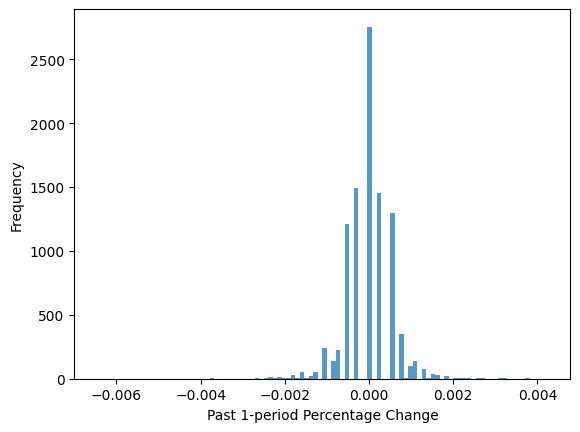

In [145]:
plt.hist(ink_returns['past_pct_change_1'].dropna(), bins=100, alpha=0.75)
plt.xlabel('Past 1-period Percentage Change')
plt.ylabel('Frequency')

In [141]:
ink_returns['past_pct_change_1'].describe()

count    9834.000000
mean       -0.000006
std         0.000583
min        -0.006460
25%        -0.000264
50%         0.000000
75%         0.000267
max         0.004247
Name: past_pct_change_1, dtype: float64

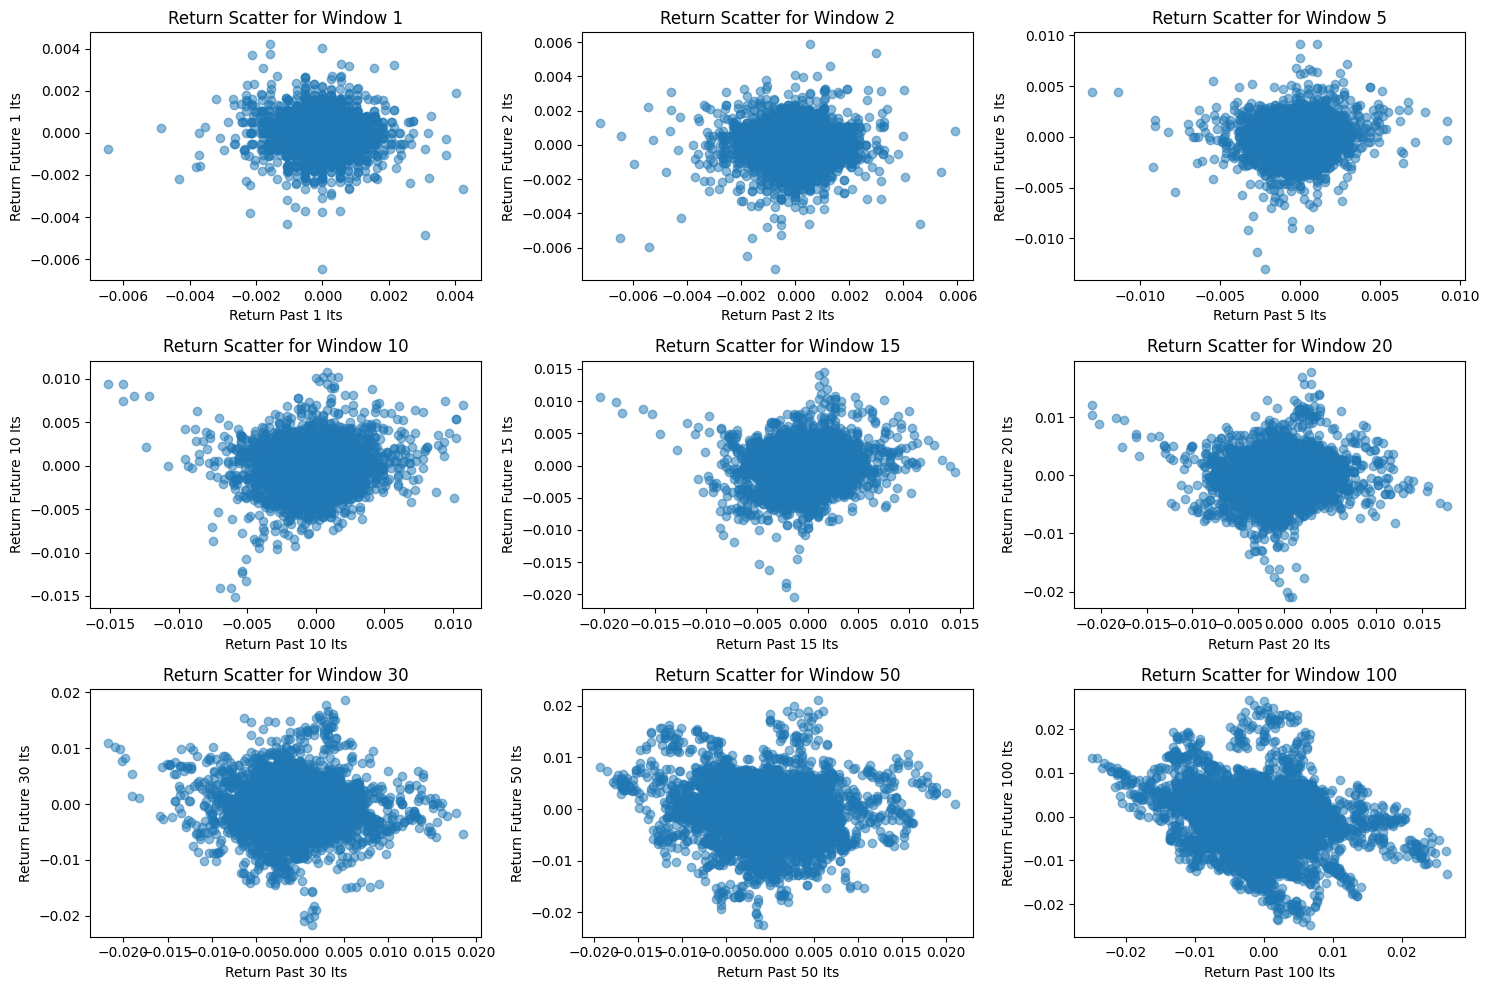

In [142]:
plt.figure(figsize=(15, 10))

for idx, i in enumerate(return_windows, start=1):
    plt.subplot(3, 3, idx)  # Adjust the grid size if needed
    plt.scatter(ink_returns[f'past_pct_change_{i}'], ink_returns[f'future_pct_change_{i}'], alpha=0.5)
    plt.xlabel(f'Return Past {i} Its')
    plt.ylabel(f'Return Future {i} Its')
    plt.title(f'Return Scatter for Window {i}')
    plt.tight_layout()

plt.show()

It seems the larger the window the more significantly we find that the mean returns are actually NOT 0

Now, question is whether we should use 0 as the mean for regression or should we use estimated mean?

Return Window: 1
beta_1 = -0.08996225432199167
slope coefficient = 0.0
Train R-squared: 0.008157245049326356
Train MSE: 3.3372738294044463e-07
Test R-squared: 0.0039722556919128404
Test MSE: 3.7448541385741196e-07

Return Window: 2
beta_1 = -0.003605054462756134
slope coefficient = 0.0
Train R-squared: -7.153858019326442e-05
Train MSE: 6.076519611185371e-07
Test R-squared: -9.162976356869024e-05
Test MSE: 6.620368087580223e-07

Return Window: 5
beta_1 = 0.07151870462094091
slope coefficient = 0.0
Train R-squared: 0.005271838453247191
Train MSE: 1.493695620102494e-06
Test R-squared: -0.000824417248783238
Test MSE: 1.5506334824129744e-06

Return Window: 10
beta_1 = 0.08157832828268925
slope coefficient = 0.0
Train R-squared: 0.0066362775522562645
Train MSE: 3.255328503381169e-06
Test R-squared: 0.005586441588611879
Test MSE: 3.3836871571998818e-06

Return Window: 15
beta_1 = 0.07892927032968192
slope coefficient = 0.0
Train R-squared: 0.005800604732435821
Train MSE: 5.186729888505815e-06

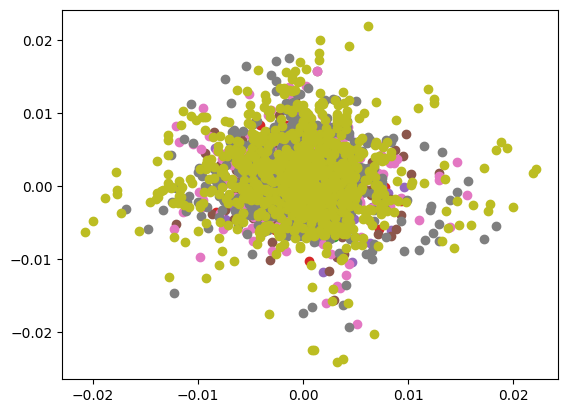

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from tqdm import tqdm

# Perform train-test split
train_data, test_data = train_test_split(ink_returns, test_size=0.1, random_state=42)

# Iterate over each iteration count
for iterations in return_windows:
    # Prepare the feature and target columns
    train_data = train_data.dropna(subset=[f'past_pct_change_{iterations}', f'future_pct_change_{iterations}'])
    test_data = test_data.dropna(subset=[f'past_pct_change_{iterations}', f'future_pct_change_{iterations}'])

    X_train = train_data[f'past_pct_change_{iterations}'].values.reshape(-1, 1)
    y_train = train_data[f'future_pct_change_{iterations}']
    X_test = test_data[f'past_pct_change_{iterations}'].values.reshape(-1, 1)
    y_test = test_data[f'future_pct_change_{iterations}']

    # Create and train the linear regression model
    model = LinearRegression(fit_intercept=False)
    model.fit(X_train, y_train)

    # Make predictions on train and test data
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    plt.scatter(X_test.reshape(-1), test_predictions - y_test)

    # Calculate R-squared and MSE for train and test data
    train_r2 = r2_score(y_train, train_predictions)
    train_mse = mean_squared_error(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    # Print the results
    print(f"Return Window: {iterations}")
    print(f"beta_1 = {model.coef_[0]}")
    print(f'slope coefficient = {model.intercept_}')
    print(f"Train R-squared: {train_r2}")
    print(f"Train MSE: {train_mse}")
    print(f"Test R-squared: {test_r2}")
    print(f"Test MSE: {test_mse}")
    print()
    # break

In [144]:
'''
Day -2 Regression Results:

Return Window: 1
beta_1 = 0.012543609217061952
slope coefficient = 0.0
Train R-squared: 0.00011382359301137512
Train MSE: 6.040564820722858e-07
Test R-squared: -0.0035225316661111616
Test MSE: 6.209408670615444e-07

Return Window: 2
beta_1 = 0.02549126421123782
slope coefficient = 0.0
Train R-squared: 0.0006104716711117231
Train MSE: 1.2366782521115359e-06
Test R-squared: 0.0003791179684075052
Test MSE: 1.005767978443612e-06

Return Window: 5
beta_1 = -0.021707752348717073
slope coefficient = 0.0
Train R-squared: 0.00044741627441358123
Train MSE: 3.3102855685129768e-06
Test R-squared: 0.001440896696469296
Test MSE: 2.992885357600893e-06



Day -1 Regression Results:

Return Window: 1
beta_1 = -0.20005280437101555
slope coefficient = 0.0
Train R-squared: 0.0398560438148311
Train MSE: 1.093074052629368e-06
Test R-squared: 0.014140612997964763
Test MSE: 6.047715927564454e-07

Return Window: 2
beta_1 = -0.2334431080066715
slope coefficient = 0.0
Train R-squared: 0.054549109295279896
Train MSE: 1.7326620344432262e-06
Test R-squared: -0.018474402465273432
Test MSE: 1.1889901468085254e-06

Return Window: 5
beta_1 = -0.13364327011834015
slope coefficient = 0.0
Train R-squared: 0.016523835745538173
Train MSE: 3.1873514494791197e-06
Test R-squared: -0.01611908448103505
Test MSE: 2.381297151131563e-06

Day 0 Regression Results:

Return Window: 1
beta_1 = -0.08996225432199167
slope coefficient = 0.0
Train R-squared: 0.008157245049326356
Train MSE: 3.3372738294044463e-07
Test R-squared: 0.0039722556919128404
Test MSE: 3.7448541385741196e-07

Return Window: 2
beta_1 = -0.003605054462756134
slope coefficient = 0.0
Train R-squared: -7.153858019326442e-05
Train MSE: 6.076519611185371e-07
Test R-squared: -9.162976356869024e-05
Test MSE: 6.620368087580223e-07

Return Window: 5
beta_1 = 0.07151870462094091
slope coefficient = 0.0
Train R-squared: 0.005271838453247191
Train MSE: 1.493695620102494e-06
Test R-squared: -0.000824417248783238
Test MSE: 1.5506334824129744e-06

'''

'\nDay -2 Regression Results:\n\nReturn Window: 1\nbeta_1 = 0.012543609217061952\nslope coefficient = 0.0\nTrain R-squared: 0.00011382359301137512\nTrain MSE: 6.040564820722858e-07\nTest R-squared: -0.0035225316661111616\nTest MSE: 6.209408670615444e-07\n\nReturn Window: 2\nbeta_1 = 0.02549126421123782\nslope coefficient = 0.0\nTrain R-squared: 0.0006104716711117231\nTrain MSE: 1.2366782521115359e-06\nTest R-squared: 0.0003791179684075052\nTest MSE: 1.005767978443612e-06\n\nReturn Window: 5\nbeta_1 = -0.021707752348717073\nslope coefficient = 0.0\nTrain R-squared: 0.00044741627441358123\nTrain MSE: 3.3102855685129768e-06\nTest R-squared: 0.001440896696469296\nTest MSE: 2.992885357600893e-06\n\n\n\nDay -1 Regression Results:\n\nReturn Window: 1\nbeta_1 = -0.20005280437101555\nslope coefficient = 0.0\nTrain R-squared: 0.0398560438148311\nTrain MSE: 1.093074052629368e-06\nTest R-squared: 0.014140612997964763\nTest MSE: 6.047715927564454e-07\n\nReturn Window: 2\nbeta_1 = -0.233443108006671